In [1]:
#read in csvs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
nadac = pd.read_csv('data/NADAC__National_Average_Drug_Acquisition_Cost_.csv')

In [3]:
nadac.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,ENEMA,536741551,0.00649,03/18/2015,ML,C/I,Y,"1, 5",G,NaN,NaN,03/25/2015
1,SEBEX SHAMPOO,536196297,0.02131,03/18/2015,ML,C/I,Y,"1, 5",G,NaN,NaN,04/01/2015
2,SIMVASTATIN 80 MG TABLET,24658030410,0.07795,02/17/2016,EA,C/I,N,1,G,NaN,NaN,03/16/2016
3,LYRICA 200 MG CAPSULE,71101768,5.63640,01/01/2016,EA,C/I,N,2,B,NaN,NaN,03/16/2016
4,RABEPRAZOLE SOD DR 20 MG TAB,65162072409,0.68732,02/17/2016,EA,C/I,N,1,G,NaN,NaN,03/16/2016


In [4]:
nadac.shape

(8590808, 12)

In [5]:
nadac.dtypes

NDC Description                               object
NDC                                            int64
NADAC_Per_Unit                               float64
Effective_Date                                object
Pricing_Unit                                  object
Pharmacy_Type_Indicator                       object
OTC                                           object
Explanation_Code                              object
Classification_for_Rate_Setting               object
Corresponding_Generic_Drug_NADAC_Per_Unit    float64
Corresponding_Generic_Drug_Effective_Date     object
As of Date                                    object
dtype: object

In [6]:
nadac.isnull().sum()

NDC Description                                    0
NDC                                                0
NADAC_Per_Unit                                     0
Effective_Date                                     0
Pricing_Unit                                       0
Pharmacy_Type_Indicator                            0
OTC                                                0
Explanation_Code                                   0
Classification_for_Rate_Setting                    0
Corresponding_Generic_Drug_NADAC_Per_Unit    8167636
Corresponding_Generic_Drug_Effective_Date    8167636
As of Date                                         0
dtype: int64

In [7]:
replacements = {r'\sCAP*?\Z|\sCP*?\Z' : ' CAPSULE ORAL',
                r'\sTAB\sCHW\s*?\Z|\sTAB\sCHEW\s*?\Z': ' CHEWABLE TABLET', 
                r'\sTAB\Z|\sTAB\s|\sTB' : ' TABLET ORAL', 
                r'\sSYR*?\Z' : ' SYRINGE', 
                r'\sCRM*?\Z' : ' CREAM', 
                r'\sSL*?\Z' : ' SUB-LINGUAL', 
                r'\sFOAM*?\Z' : ' FOAM', 
                r'\sAUTO\-INJ*?\Z' : ' INJECTION', 
                r'\sEFF*?\Z' : ' EFFERVESCENT', 
                r'\sSOLN*?\Z' : ' SOLUTION', 
                r'\sINH*?\Z' : ' INHALATION', 
                r'\sHCL\s*?\Z' : ' HYDROCHLORIDE',
                r'\sCPLT*?\Z' : ' CAPLET',
                r'\sGASTR\s*?\Z' : ' GASTRIC',
                r'\sOSM\s*?\Z' : ' OSMOTIC',
                r'\sLIQ*?\Z' : ' LIQUID',
                '\s\*\*.*\*\*\s' : '',
                ' MG' : 'MG',
                ' ML' : 'ML',
                ' MCG' : 'MCG',
                ' +': ' '
               }

for regex_pattern, replacement in replacements.items():
    regex_pattern = re.compile(regex_pattern)
    nadac['NDC Description'] = nadac['NDC Description'].str.replace(regex_pattern, replacement)

In [8]:
nadac.head()

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
0,ENEMA,536741551,0.00649,03/18/2015,ML,C/I,Y,"1, 5",G,NaN,NaN,03/25/2015
1,SEBEX SHAMPOO,536196297,0.02131,03/18/2015,ML,C/I,Y,"1, 5",G,NaN,NaN,04/01/2015
2,SIMVASTATIN 80MG TABLET,24658030410,0.07795,02/17/2016,EA,C/I,N,1,G,NaN,NaN,03/16/2016
3,LYRICA 200MG CAPSULE,71101768,5.63640,01/01/2016,EA,C/I,N,2,B,NaN,NaN,03/16/2016
4,RABEPRAZOLE SOD DR 20MG TABLET ORAL,65162072409,0.68732,02/17/2016,EA,C/I,N,1,G,NaN,NaN,03/16/2016


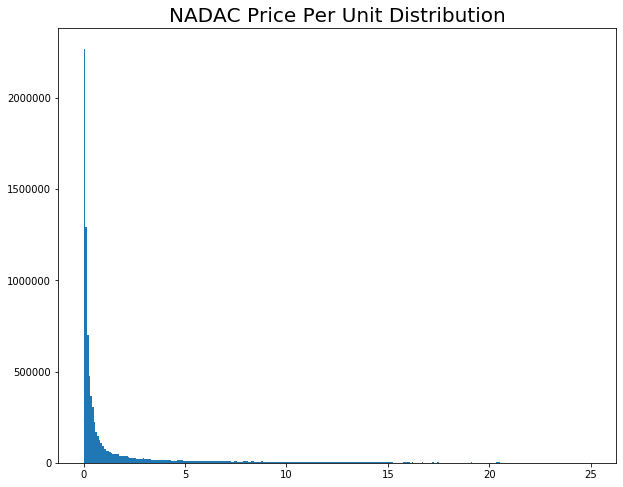

In [9]:
plt.figure(figsize=(10,8))
plt.hist(nadac['NADAC_Per_Unit'], bins=300, range=(0,25))
plt.title('NADAC Price Per Unit Distribution', size=20)
plt.savefig('./images/price_per_unit.jpg');
#This is most of the data's distribution

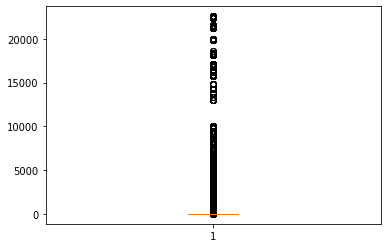

In [10]:
plt.boxplot(nadac['NADAC_Per_Unit']);

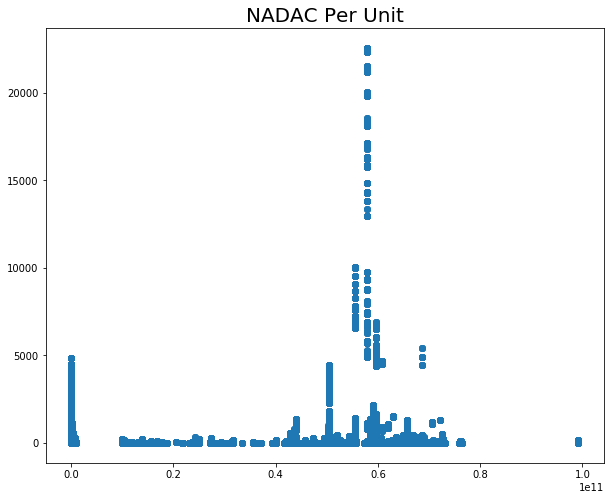

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(x=nadac['NDC'], y=nadac['NADAC_Per_Unit'])
plt.title('NADAC Per Unit', size=20);

In [12]:
nadac[nadac['NADAC_Per_Unit']>5000]

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
11229,SIMPONI 50MG/0.5ML SYRINGE,57894007001,7459.85909,03/03/2016,ML,C/I,N,"3, 5",B,NaN,NaN,03/16/2016
12491,SIMPONI 50MG/0.5ML PEN INJEC,57894007002,7387.56283,03/03/2016,ML,C/I,N,"3, 5",B,NaN,NaN,03/16/2016
15153,NEULASTA 6MG/0.6ML SYRINGE,55513019001,8270.41000,03/16/2016,ML,C/I,N,"3, 5",B,NaN,NaN,03/16/2016
15553,STELARA 45MG/0.5ML SYRINGE,57894006003,16351.96408,11/04/2015,ML,C/I,N,"4, 5",B,NaN,NaN,03/16/2016
29698,STELARA 90MG/ML SYRINGE,57894006103,16227.53991,11/18/2015,ML,C/I,N,"4, 5",B,NaN,NaN,03/16/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8571926,SIMPONI 50MG/0.5ML PEN INJEC,57894007002,9761.05240,01/20/2020,ML,C/I,N,"4, 5",B,NaN,NaN,09/09/2020
8577649,AVONEX PEN 30MCG/0.5ML KIT,59627033304,6858.22500,01/01/2020,EA,C/I,N,"2, 5",B,NaN,NaN,09/09/2020
8578518,STELARA 45MG/0.5ML SYRINGE,57894006003,22568.10208,01/20/2020,ML,C/I,N,"4, 5",B,NaN,NaN,09/09/2020
8580998,STELARA 90MG/ML SYRINGE,57894006103,22344.19167,05/20/2020,ML,C/I,N,"2, 5",B,NaN,NaN,09/09/2020


In [13]:
nadac['NDC'].value_counts().unique

<bound method Series.unique of 54838054070    355
60505265305    355
603465534      355
51079002301    355
51079075920    355
              ... 
66689073505      1
57664033988      1
378461501        1
69452012020      1
69543037210      1
Name: NDC, Length: 43222, dtype: int64>

In [14]:
nadac[nadac['NDC']==60505265305]

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
3305,TRAZODONE 50MG TABLET,60505265305,0.02184,01/21/2015,EA,C/I,N,1,G,NaN,NaN,02/04/2015
18319,TRAZODONE 50MG TABLET,60505265305,0.05680,02/17/2016,EA,C/I,N,1,G,NaN,NaN,03/16/2016
44209,TRAZODONE 50MG TABLET,60505265305,0.05983,03/23/2016,EA,C/I,N,1,G,NaN,NaN,03/23/2016
49998,TRAZODONE 50MG TABLET,60505265305,0.05983,03/23/2016,EA,C/I,N,1,G,NaN,NaN,03/30/2016
91285,TRAZODONE 50MG TABLET,60505265305,0.05983,03/23/2016,EA,C/I,N,1,G,NaN,NaN,04/06/2016
...,...,...,...,...,...,...,...,...,...,...,...,...
8474308,TRAZODONE 50MG TABLET,60505265305,0.04046,07/22/2020,EA,C/I,N,1,G,NaN,NaN,08/12/2020
8505758,TRAZODONE 50MG TABLET,60505265305,0.04190,08/19/2020,EA,C/I,N,1,G,NaN,NaN,08/19/2020
8521143,TRAZODONE 50MG TABLET,60505265305,0.04190,08/19/2020,EA,C/I,N,1,G,NaN,NaN,08/26/2020
8555854,TRAZODONE 50MG TABLET,60505265305,0.04190,08/19/2020,EA,C/I,N,1,G,NaN,NaN,09/02/2020


In [15]:
nadac.to_csv('./data/nadac.csv')

In [16]:
nadac_no_repeats = nadac.sort_values('As of Date', ascending=False).drop_duplicates(['NDC'])
nadac_no_repeats.head()
#Remove repeated drugs from earlier prices - using the most current data
#I want to keep the original df in case I decide to look at timeseries data

,NDC Description,NDC,NADAC_Per_Unit,Effective_Date,Pricing_Unit,Pharmacy_Type_Indicator,OTC,Explanation_Code,Classification_for_Rate_Setting,Corresponding_Generic_Drug_NADAC_Per_Unit,Corresponding_Generic_Drug_Effective_Date,As of Date
2419129,AMOXICILLIN 250MG/5ML SUSP,67253014308,0.02704,12/17/2014,ML,C/I,N,"1, 5",G,NaN,NaN,12/31/2014
940405,GLYBURIDE-METFORMIN 2.5-500MG,93571105,0.07689,12/17/2014,EA,C/I,N,1,G,NaN,NaN,12/31/2014
1725050,METFORMIN HCL 500MG TABLET,904634393,0.01643,12/17/2014,EA,C/I,N,1,G,NaN,NaN,12/31/2014
1725058,RITALIN SR 20MG TABLET,78044205,2.15622,01/22/2014,EA,C/I,N,4,B,1.60324,12/17/2014 12:00:00 AM,12/31/2014
941013,METFORMIN HCL 500MG TABLET,68462015990,0.01643,12/17/2014,EA,C/I,N,1,G,NaN,NaN,12/31/2014


In [17]:
nadac_no_repeats.shape

(43222, 12)

In [18]:
nadac_no_repeats.sort_index(inplace=True)

In [19]:
nadac_no_repeats.to_csv('data/nadac_no_repeats.csv')

In [20]:
most common generics
most common drugs w/ no generics
look at drugs with insulin
inopril drugs

SyntaxError: invalid syntax (<ipython-input-20-43d8fc8cda56>, line 1)

In [ ]:
top_drugs = nadac['NDC Description'].value_counts().sort_values(ascending = False)
top_20_drugs = top_drugs[:20].index.tolist()
top_20_drugs

In [ ]:
generics = nadac[nadac['Classification_for_Rate_Setting']=='G']
top_generics = generics['NDC Description'].value_counts().sort_values(ascending = False)
top_20_generics = top_generics[:20].index.tolist()
top_20_generics

In [ ]:
#Are all the top drugs generic?
top_20_drugs == top_20_generics

In [ ]:
brands = nadac[nadac['Classification_for_Rate_Setting']=='B']
top_brands = brands['NDC Description'].value_counts().sort_values(ascending = False)
top_20_brands = top_brands [:20].index.tolist()
top_20_brands

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(top_brands.index[:20], top_brands[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Brand Name Drugs in the NADAC Data', size=20)
plt.savefig('./images/top_20_brand.jpg');

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(top_generics.index[:20], top_generics[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Generic Drugs in the NADAC Data', size=20)
plt.savefig('./images/top_20_generic.jpg');

In [ ]:
plt.figure(figsize=(10,8))
plt.bar(top_drugs.index[:20], top_drugs[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Drugs in the NADAC Data', size=20)
plt.savefig('./images/top_20_drug.jpg');
#Note, these are all generics, and this is the same as the generic chart

In [ ]:
top 3 brands
top 3 generic 
date time